https://www.ztm.waw.pl/?c=628

In [1]:
# import helper 
import sys
sys.path.append("/Users/xszpo/Google Drive/DataScience/Projects/201907_xFlat_AWS_Scrapy")

# run scrapy settings
%run /Users/xszpo/Google\ Drive/DataScience/Projects/201907_xFlat_AWS_Scrapy/scraper/settings.py

In [2]:
%load_ext autoreload
%autoreload 2

import os 
import codecs
import numpy as np
import helpers
import re
import json
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
os.listdir(LOCAL_DATA_PATH_DICT)

['.DS_Store', 'RA190914.TXT', 'RA190914.7z', 'bus_stops.json', 'url.txt']

In [4]:
path_ = os.path.join(LOCAL_DATA_PATH_DICT,'RA190914.TXT')
os.path.exists(path_)

True

In [5]:
with codecs.open(path_, 'r', encoding='Windows-1250' ) as f:
    txt = f.readlines()

In [6]:
txt_d = {}
txt_r = [i.replace('\r\n','') for i in txt]

start = []
for i,line in enumerate(txt_r):
    if line.startswith("*"):
        start += [i]

for i in list(zip(start,start[1:]+[len(txt_r)])):
    txt_d[txt_r[i[0]][1:3]]=txt_r[i[0]+1:i[1]-1]

In [7]:
_tmp_1 = txt_d['ZP']
sPR = []
ePR = []
bus_stops = []
flag = False

for i, line in enumerate(_tmp_1):
    if re.match(r'^ +\d{4} ', line):
        name = re.split("  +",line)[2]
        flag = False
    if flag and not(re.match(r'^ +\d{6}', line)):
        bus_stops[-1]['bus_lines'] += re.split(" +",line[40:])
        bus_stops[-1]['bus_lines'] = list(set(bus_stops[-1]['bus_lines']))
        bus_stops[-1]['bus_lines'] = list(filter(lambda x: x != "", bus_stops[-1]['bus_lines']))
    if line.strip().startswith("*PR"):
        sPR += [i+1]
    if line.strip().startswith("#PR"):
        ePR += [i]
    if re.match(r'^ +\d{6}', line):
        _tmp_2 = re.split("  +",line)
#        print(_tmp_2)
        bus_stops+=[{
            "name":name,
            "number":_tmp_2[1],
            "Y": float(_tmp_2[5][3:]) if _tmp_2[5][3:][0].isdigit() else None,
            "X":float(_tmp_2[6][3:]) if _tmp_2[6][3:][0].isdigit() else None,
            "bus_lines":[]
        }]
        flag = True
PR = zip(sPR,ePR)


In [8]:
with codecs.open(os.path.join(LOCAL_DATA_PATH_DICT,'bus_stops.json'), "w", "utf-8") as file:
    json.dump(bus_stops, file)

In [9]:
import codecs
import pandas as pd
import geopandas
import json


def read_bus_gpd(path, file, X = "X", Y="Y"):
    with codecs.open(os.path.join(path,file), "r", "utf-8") as file:
        bus_stops_json = json.loads(file.read())
    bus_stops_df = pd.DataFrame(bus_stops_json)
    bus_stops_gdf = geopandas.GeoDataFrame(
        bus_stops_df, geometry=geopandas.points_from_xy(bus_stops_df[X], bus_stops_df[Y]))
    return bus_stops_gdf

gpd = read_bus_gpd(path=LOCAL_DATA_PATH_DICT, file='bus_stops.json')

In [12]:
type(gpd['bus_lines'][0])

list

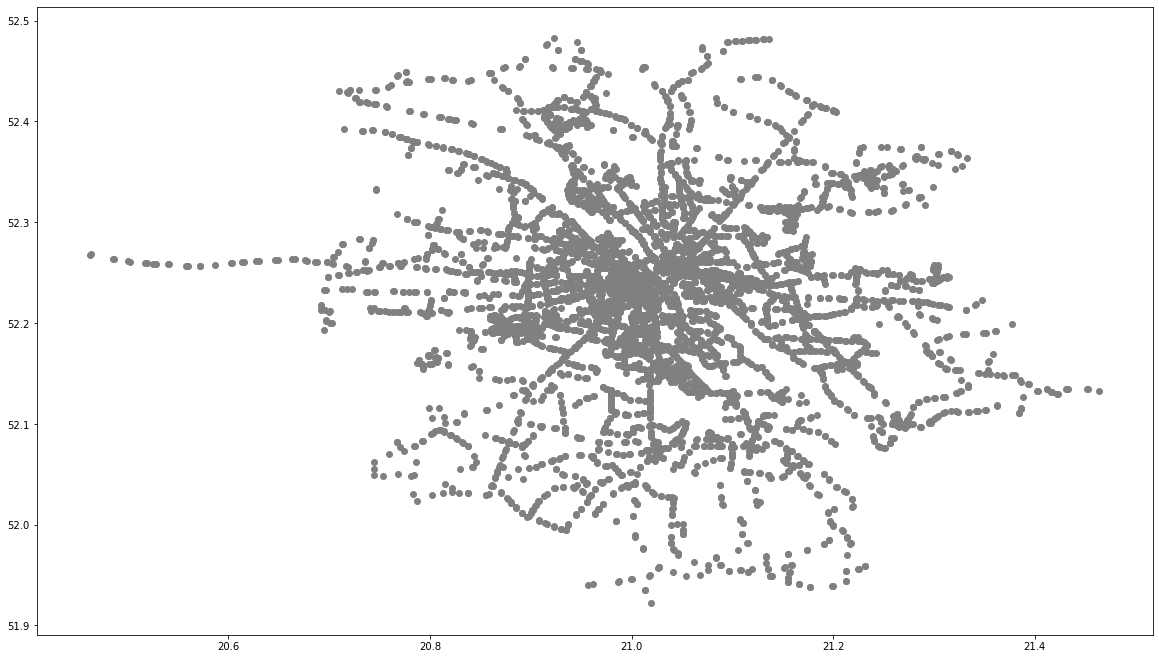

In [15]:
fig, ax = plt.subplots(figsize=(20,20))

# We can now plot our ``GeoDataFrame``.
gpd.plot(ax=ax, color='gray')

plt.show()